# Popular 10000 movies listed on TMDb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [37]:
cast_df = pd.read_csv('../data/popular_10000_movies/cast_dataset.csv', index_col='id')
crew_df = pd.read_csv('../data/popular_10000_movies/crew_dataset.csv', index_col='id')
keywords_df = pd.read_csv('../data/popular_10000_movies/keywords_dataframe.csv', index_col='id')
mov_df = pd.read_csv('../data/popular_10000_movies/movies_dataset.csv', index_col='id')

keywords_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [38]:
movies_df = mov_df.merge(cast_df, on='id').merge(crew_df, on ='id').merge(keywords_df, on ='id')
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [39]:
movies_df.head()

,genre_ids,original_language,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,,
385687,"[28, 80, 53]",en,Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",en,Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]",en,"With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]",en,"While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."


In [40]:
movies_df['original_language'].value_counts()

en    10652
Name: original_language, dtype: int64

In [41]:
movies_df.drop('original_language', axis=1, inplace=True)

In [42]:
no_keywords_ids = movies_df[movies_df['keywords']=='[]'].index
duplicated = movies_df[movies_df.duplicated(['overview'])].index

In [8]:
no_keywords_ids

Int64Index([1074034, 1115710, 1073140, 1094319, 1016121,  893345,  993867,
            1070777,   44918, 1129956,
            ...
             767499,  430682,   37527,  718100,   54648,  538604,  560362,
             987337,  653746,  583081],
           dtype='int64', name='id', length=782)

In [9]:
np.intersect1d(no_keywords_ids, duplicated)

array([144204, 538207, 661286, 724989, 892153], dtype=int64)

In [43]:
movies_df.drop_duplicates(['overview'], inplace=True)

In [44]:
movies_df[movies_df['keywords']=='[]']

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
1074034,"[28, 10752, 53]","When a small outpost is ambushed, a US Army sq...",493.641,2023-02-24,Ambush,5.8,18,"Action, War, Thriller","[{'cast_id': 1244, 'name': 'Jonathan Rhys Meye...","[{'crew_id': 58267, 'name': 'Matthew Cassel', ...",[]
1115710,[27],"A year after the incident at the Mount, the po...",270.780,2023-05-12,The Mount 2,4.6,9,Horror,"[{'cast_id': 1861780, 'name': 'Niall Serra', '...","[{'crew_id': 1770947, 'name': 'Ian Charles Ser...",[]
1073140,"[28, 12]","France is in turmoil and a new, naive King fin...",298.768,2023-03-23,The Three Musketeers,5.6,42,"Action, Adventure","[{'cast_id': 2992825, 'name': 'Malachi Pullar-...","[{'crew_id': 24840, 'name': 'Alexandre Dumas',...",[]
1094319,"[28, 53]",Mercenaries seize control of a remote resort h...,239.611,2023-04-21,The Best Man,6.1,70,"Action, Thriller","[{'cast_id': 72440, 'name': 'Brendan Fehr', 'c...","[{'crew_id': 59502, 'name': 'Shane Dax Taylor'...",[]
1016121,"[10749, 18, 35]",Bad-boy Travis is exactly what college freshma...,223.937,2023-04-04,Beautiful Disaster,6.5,302,"Romance, Drama, Comedy","[{'cast_id': 95686, 'name': 'Dylan Sprouse', '...","[{'crew_id': 11873, 'name': 'Roger Kumble', 'd...",[]
...,...,...,...,...,...,...,...,...,...,...,...
538604,"[35, 10402]",When an aspiring rapper goes viral for the wro...,11.113,2018-08-24,The After Party,6.2,187,"Comedy, Music","[{'cast_id': 2120829, 'name': 'Kyle Harvey', '...","[{'crew_id': 21717, 'name': 'Carole Kravetz Ay...",[]
560362,"[53, 18, 9648, 27]",After a mysterious woman saves her daughter fr...,12.177,2019-10-25,Rattlesnake,5.2,392,"Thriller, Drama, Mystery, Horror","[{'cast_id': 37158, 'name': 'Carmen Ejogo', 'c...","[{'crew_id': 13000, 'name': 'Roberto Schaefer'...",[]
987337,"[16, 35]",Mickey Mouse and his friends each recall the w...,11.091,2022-07-08,The Wonderful Summer of Mickey Mouse,6.3,10,"Animation, Comedy","[{'cast_id': 1217648, 'name': 'Chris Diamantop...","[{'crew_id': 60300, 'name': 'Darrick Bachman',...",[]


<AxesSubplot:xlabel='popularity', ylabel='title'>

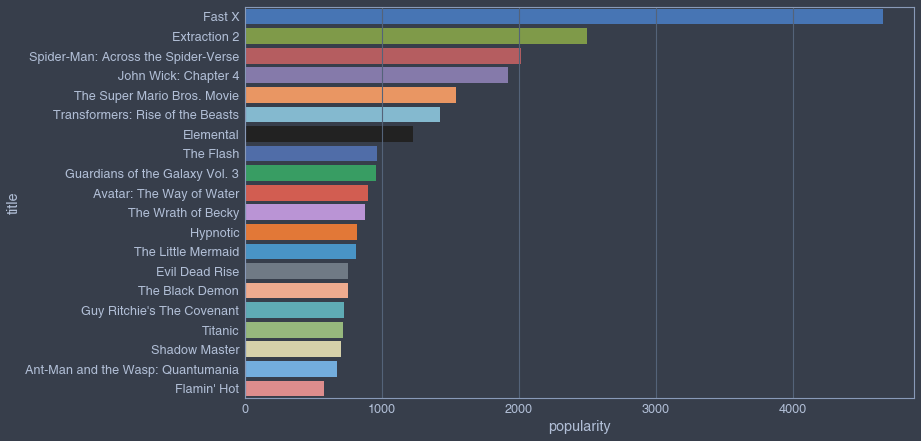

In [66]:
top_popularity = movies_df.sort_values(['popularity'], ascending=False).head(20)
sns.barplot(data=top_popularity, x='popularity', y='title')

<AxesSubplot:xlabel='vote_average', ylabel='title'>

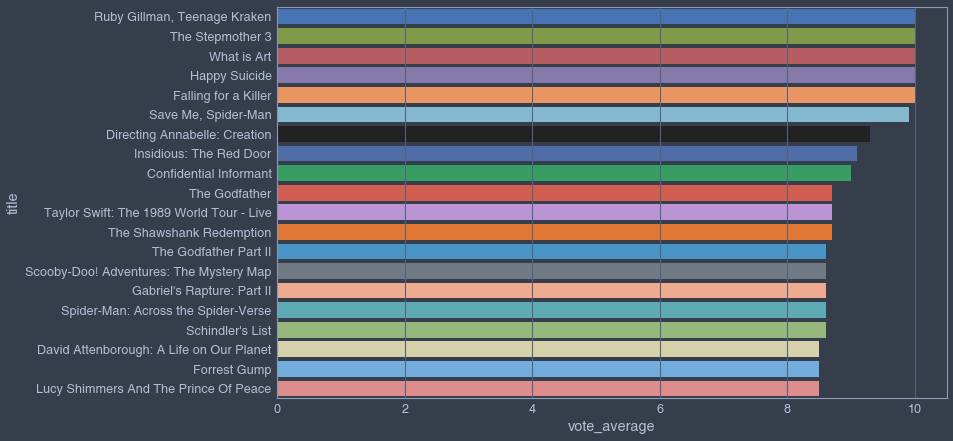

In [67]:
top_vote = movies_df.sort_values(['vote_average'], ascending=False).head(20)
sns.barplot(data=top_vote, x='vote_average', y='title')

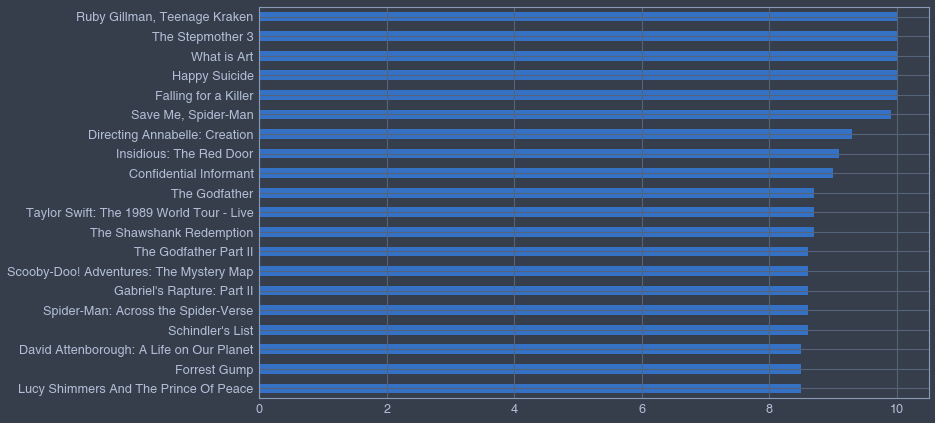

In [83]:
top_vote_2 = pd.Series(top_vote['vote_average'].to_list(), index=top_vote['title'].to_list()) 
top_vote_2.plot(kind='barh').invert_yaxis()

Text(0, 0.5, 'Popularity')

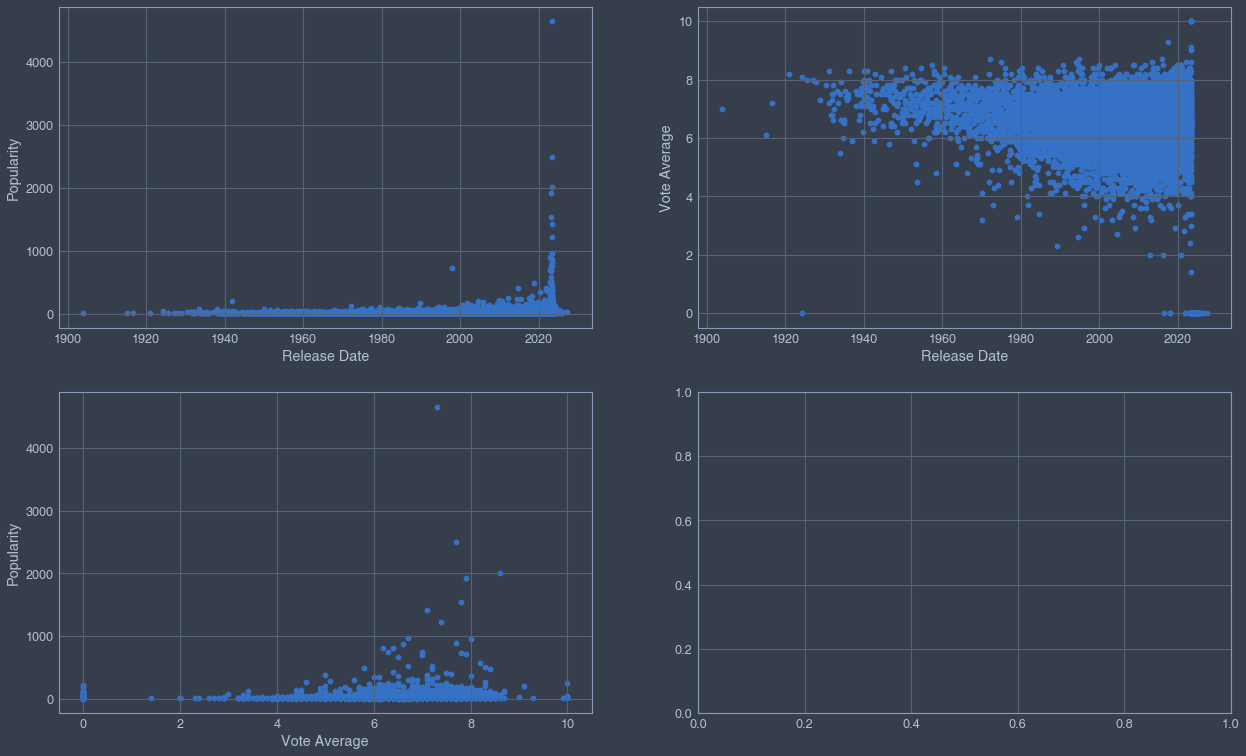

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(21, 13))

axs[0, 0].scatter(movies_df['release_date'], movies_df['popularity'])
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Popularity')

axs[0, 1].scatter(movies_df['release_date'], movies_df['vote_average'])
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Vote Average')

axs[1, 0].scatter(movies_df['vote_average'], movies_df['popularity'])
axs[1, 0].set_xlabel('Vote Average')
axs[1, 0].set_ylabel('Popularity')

In [7]:
movies_df.groupby('release_date')['genres'].value_counts()

release_date  genres                                               
1903-12-07    Crime, Action, Western                                   1
1915-02-08    Drama, History, War                                      1
1916-09-04    Drama, History                                           1
1921-01-21    Comedy, Drama                                            1
1924-04-17    Action, Comedy, Mystery                                  1
                                                                      ..
2025-12-17    Action, Science Fiction, Adventure                       1
2026-04-29    Action, Science Fiction, Adventure                       1
2027-05-05    Action, Science Fiction                                  1
2029-12-19    Action, Science Fiction, Adventure, Fantasy, Thriller    1
2031-12-17    Action, Adventure, Science Fiction                       1
Name: genres, Length: 9827, dtype: int64

In [13]:
genres_by_date = movies_df.groupby('release_date')['genres'].value_counts()

In [14]:
genres_by_date = genres_by_date.to_frame()

In [15]:
genres_by_date = genres_by_date.rename(columns={'genres': 'genres_count'})

In [16]:
genres_by_date.reset_index(inplace=True)
genres_by_date

,release_date,genres,genres_count
0,1903-12-07,"Crime, Action, Western",1
1,1915-02-08,"Drama, History, War",1
2,1916-09-04,"Drama, History",1
3,1921-01-21,"Comedy, Drama",1
4,1924-04-17,"Action, Comedy, Mystery",1
...,...,...,...
9818,2025-06-27,"Adventure, Comedy, Family, Fantasy",1
9819,2025-10-04,"Action, Animation, Drama, Mystery, Thriller",1
9820,2025-12-17,"Action, Science Fiction, Adventure",1
9821,2026-04-29,"Action, Science Fiction, Adventure",1


In [17]:
most_pop = movies_df[['release_date', 'title']]
most_pop.reset_index(inplace=True)
most_pop.drop('id', axis=1, inplace=True)

f:\python\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
most_pop.set_index(['release_date'], inplace=True)

In [19]:
most_pop.loc['2020-1-1':'2021-1-1']

,title
release_date,
2020-04-24,Extraction
2020-09-02,After We Collided
2020-04-12,Mortal Kombat Legends: Scorpion's Revenge
2020-02-19,The Call of the Wild
2020-08-26,Making The Witcher
...,...
2020-11-13,Too Close for Christmas
2020-04-10,The Lost Husband
2020-07-20,The Swan Princess: A Royal Wedding


Text(0, 0.5, 'Genres Count')

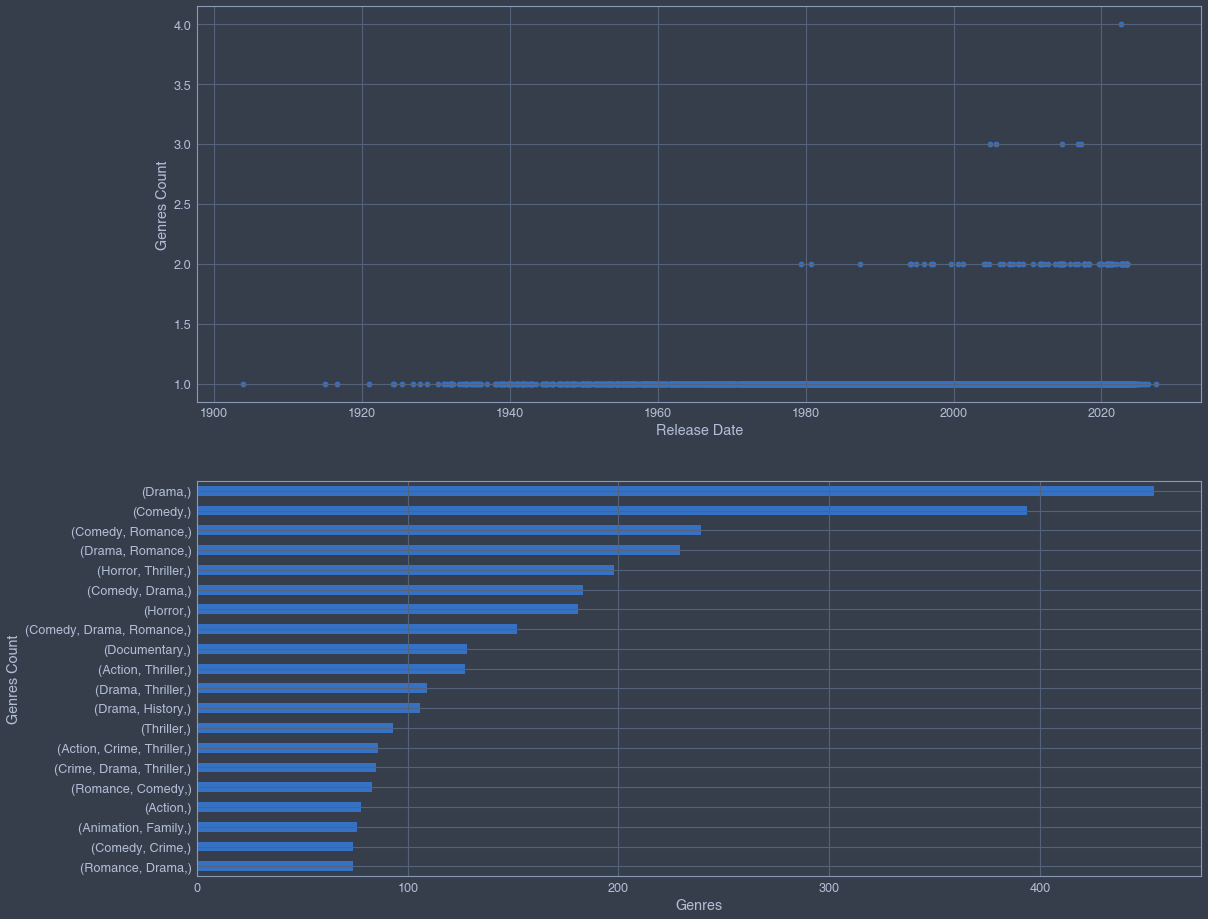

In [76]:
fig, axs = plt.subplots(2, 1, figsize=(18, 16))

axs[0].scatter(genres_by_date['release_date'], genres_by_date['genres_count'])
axs[0].set_xlabel('Release Date')
axs[0].set_ylabel('Genres Count')

genres_by_date.value_counts(['genres']).head(20).plot(kind='barh', x='genres', y='count', ax=axs[1]).invert_yaxis()
axs[1].set_xlabel('Genres')
axs[1].set_ylabel('Genres Count')

In [40]:
genres_by_date[genres_by_date['genres']=='Horror']

,release_date,genres,genres_count
252,1958-05-22,Horror,1
334,1963-03-28,Horror,1
345,1963-08-21,Horror,1
395,1966-01-09,Horror,1
456,1968-07-20,Horror,1
...,...,...,...
9666,2023-05-12,Horror,1
9683,2023-05-26,Horror,1
9695,2023-06-09,Horror,2
9704,2023-06-14,Horror,1


In [20]:
genres_by_date

,release_date,genres,genres_count
0,1903-12-07,"Crime, Action, Western",1
1,1915-02-08,"Drama, History, War",1
2,1916-09-04,"Drama, History",1
3,1921-01-21,"Comedy, Drama",1
4,1924-04-17,"Action, Comedy, Mystery",1
...,...,...,...
9818,2025-06-27,"Adventure, Comedy, Family, Fantasy",1
9819,2025-10-04,"Action, Animation, Drama, Mystery, Thriller",1
9820,2025-12-17,"Action, Science Fiction, Adventure",1
9821,2026-04-29,"Action, Science Fiction, Adventure",1


Text(0, 0.5, 'Count')

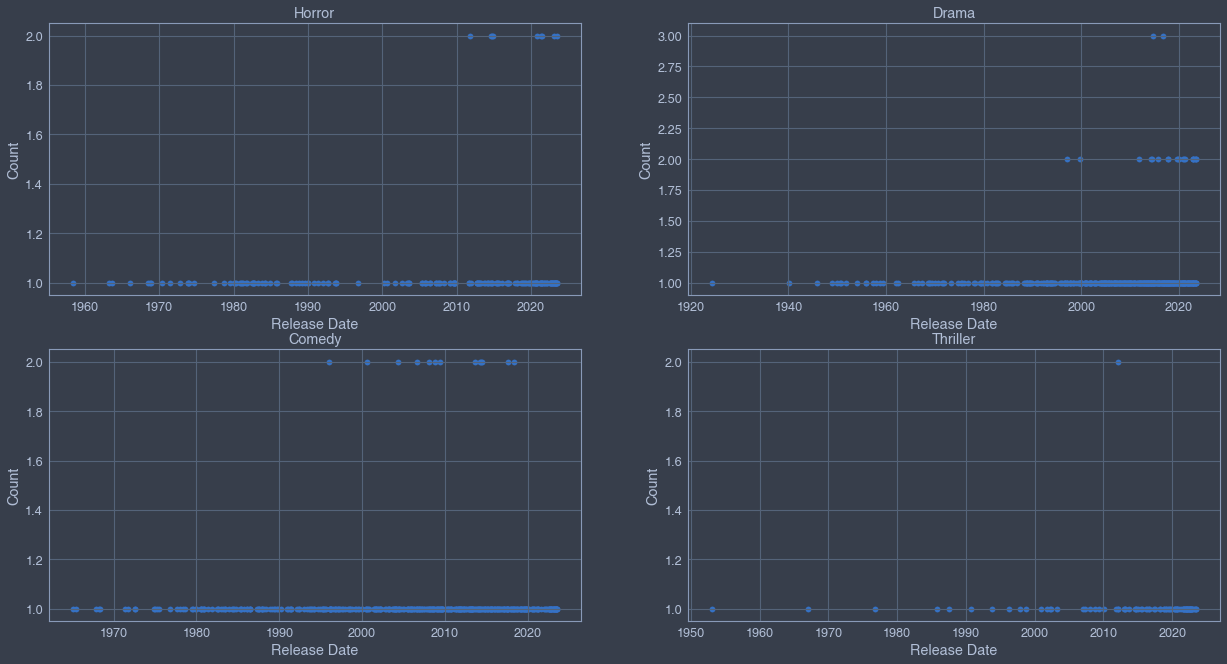

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(21, 11))

axs[0, 0].scatter(genres_by_date[genres_by_date['genres']=='Horror']['release_date'],
               genres_by_date[genres_by_date['genres']=='Horror']['genres_count'])
axs[0, 0].set_title('Horror')
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Count')

axs[0, 1].scatter(genres_by_date[genres_by_date['genres']=='Drama']['release_date'],
               genres_by_date[genres_by_date['genres']=='Drama']['genres_count'])
axs[0, 1].set_title('Drama')
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Count')

axs[1, 0].scatter(genres_by_date[genres_by_date['genres']=='Comedy']['release_date'],
               genres_by_date[genres_by_date['genres']=='Comedy']['genres_count'])
axs[1, 0].set_title('Comedy')
axs[1, 0].set_xlabel('Release Date')
axs[1, 0].set_ylabel('Count')

axs[1, 1].scatter(genres_by_date[genres_by_date['genres']=='Thriller']['release_date'],
               genres_by_date[genres_by_date['genres']=='Thriller']['genres_count'])
axs[1, 1].set_title('Thriller')
axs[1, 1].set_xlabel('Release Date')
axs[1, 1].set_ylabel('Count')

In [22]:
comedy_romance = movies_df[(movies_df['genres']=='Comedy, Romance') | (movies_df['genres']=='Romance, Comedy')]
drama_romance = movies_df[(movies_df['genres']=='Drama, Romance') | (movies_df['genres']=='Romance, Drama')]

In [23]:
comedy_romance

,genre_ids,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,
884605,"[35, 10749]","On the brink of losing her childhood home, Mad...",433.211,2023-06-15,No Hard Feelings,6.4,77,"Comedy, Romance","[{'cast_id': 72129, 'name': 'Jennifer Lawrence...","[{'crew_id': 5359, 'name': 'Mychael Danna', 'd...","[{'id': 9799, 'name': 'romantic comedy'}, {'id..."
561717,"[10749, 35]","After a high-profile firing, Jenna’s fashion c...",216.706,2023-06-23,The Perfect Find,6.4,19,"Romance, Comedy","[{'cast_id': 17773, 'name': 'Gabrielle Union',...","[{'crew_id': 17773, 'name': 'Gabrielle Union',...","[{'id': 818, 'name': 'based on novel or book'}..."
232672,"[35, 10749]",After a divorced mom and widowed dad have a di...,68.973,2014-05-21,Blended,6.9,3122,"Comedy, Romance","[{'cast_id': 19292, 'name': 'Adam Sandler', 'c...","[{'crew_id': 2593, 'name': 'Rupert Gregson-Wil...","[{'id': 409, 'name': 'africa'}, {'id': 641, 'n..."
114,"[35, 10749]",When a millionaire wheeler-dealer enters a bus...,64.533,1990-03-23,Pretty Woman,7.4,7205,"Comedy, Romance","[{'cast_id': 1205, 'name': 'Richard Gere', 'ch...","[{'crew_id': 376, 'name': 'Arnon Milchan', 'de...","[{'id': 549, 'name': 'prostitute'}, {'id': 592..."
2105,"[35, 10749]","At a high-school party, four friends find that...",56.981,1999-07-09,American Pie,6.6,7003,"Comedy, Romance","[{'cast_id': 21593, 'name': 'Jason Biggs', 'ch...","[{'crew_id': 298, 'name': 'Chris Bender', 'dep...","[{'id': 3687, 'name': 'graduation'}, {'id': 61..."
...,...,...,...,...,...,...,...,...,...,...,...
267463,"[10749, 35]",Myles and Brody are best friends with two very...,11.241,2014-09-06,The 10 Year Plan,6.8,275,"Romance, Comedy","[{'cast_id': 1525042, 'name': 'Jack Turner', '...","[{'crew_id': 36051, 'name': 'Mark Sikes', 'dep...","[{'id': 8015, 'name': 'cop'}, {'id': 10050, 'n..."
17887,"[35, 10749]","In this film based on a Neil Simon play, newly...",11.215,1967-05-25,Barefoot in the Park,7.1,518,"Comedy, Romance","[{'cast_id': 4135, 'name': 'Robert Redford', '...","[{'crew_id': 3892, 'name': 'Johnny Mercer', 'd...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
513576,"[10749, 35]","Reunited after 15 years, famous chef Sasha and...",11.150,2019-05-31,Always Be My Maybe,6.7,1224,"Romance, Comedy","[{'cast_id': 591835, 'name': 'Ali Wong', 'char...","[{'crew_id': 1589, 'name': 'Michael Andrews', ...","[{'id': 242, 'name': 'new york city'}, {'id': ..."


Text(0, 0.5, 'Vote Average')

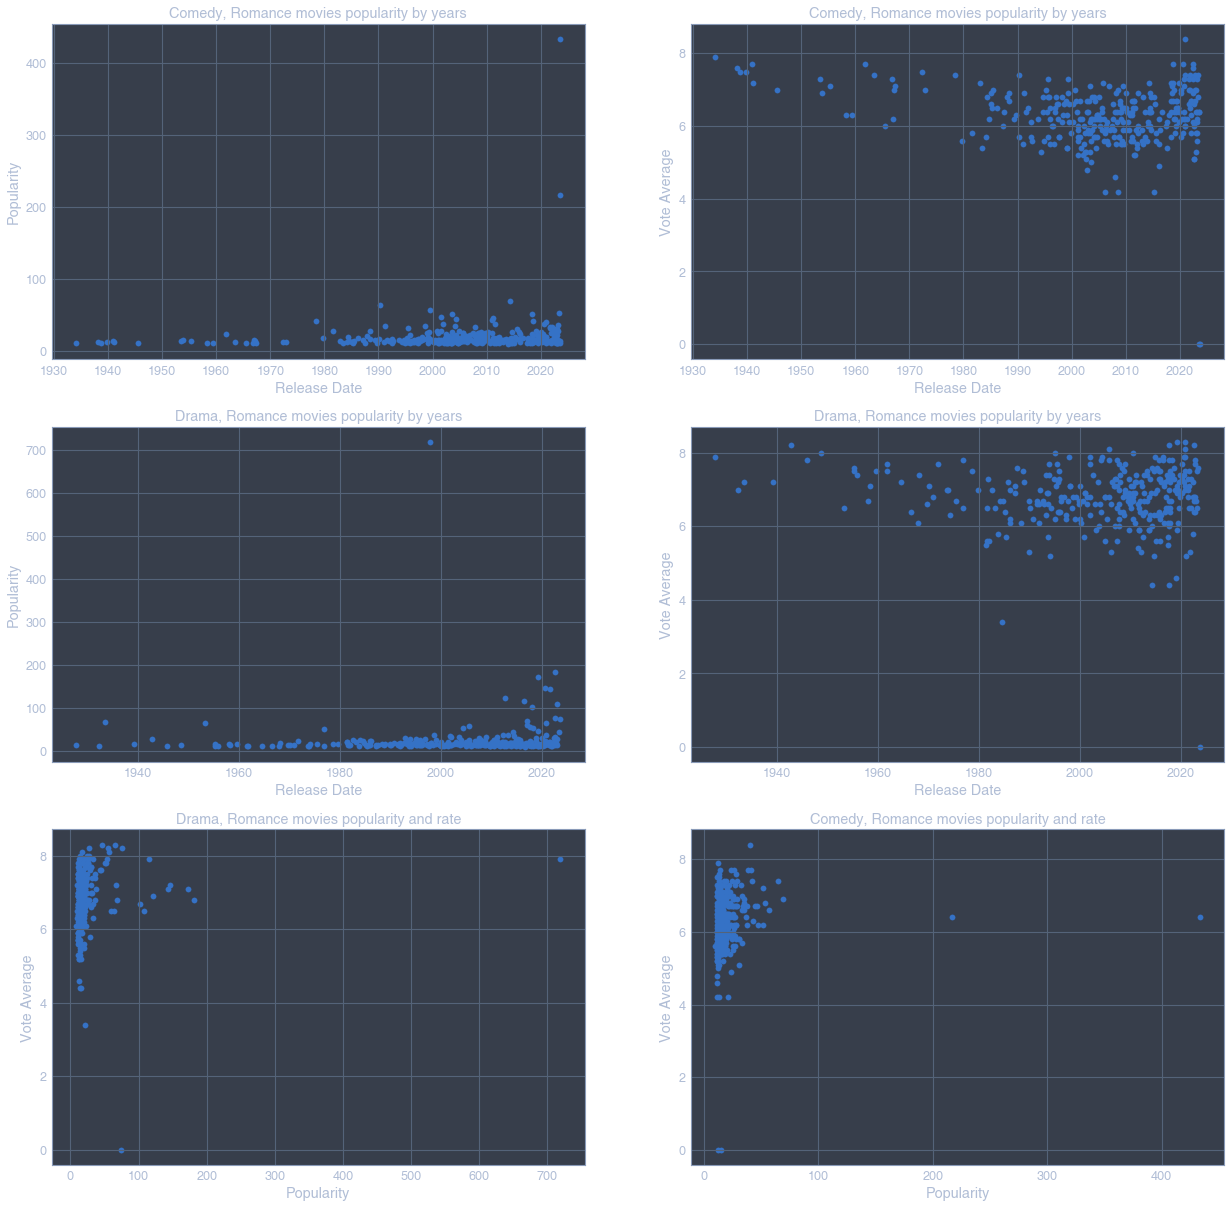

In [53]:
fig, axs = plt.subplots(3, 2, figsize=(21, 21))

axs[0, 0].scatter(comedy_romance['release_date'],
               comedy_romance['popularity'])
axs[0, 0].set_title('Comedy, Romance movies popularity by years')
axs[0, 0].set_xlabel('Release Date')
axs[0, 0].set_ylabel('Popularity')

axs[1, 0].scatter(drama_romance['release_date'],
               drama_romance['popularity'])
axs[1, 0].set_title('Drama, Romance movies popularity by years')
axs[1, 0].set_xlabel('Release Date')
axs[1, 0].set_ylabel('Popularity')

axs[0, 1].scatter(comedy_romance['release_date'],
               comedy_romance['vote_average'])
axs[0, 1].set_title('Comedy, Romance movies popularity by years')
axs[0, 1].set_xlabel('Release Date')
axs[0, 1].set_ylabel('Vote Average')

axs[1, 1].scatter(drama_romance['release_date'],
               drama_romance['vote_average'])
axs[1, 1].set_title('Drama, Romance movies popularity by years')
axs[1, 1].set_xlabel('Release Date')
axs[1, 1].set_ylabel('Vote Average')

axs[2, 0].scatter(drama_romance['popularity'],
               drama_romance['vote_average'])
axs[2, 0].set_title('Drama, Romance movies popularity and rate')
axs[2, 0].set_xlabel('Popularity')
axs[2, 0].set_ylabel('Vote Average')

axs[2, 1].scatter(comedy_romance['popularity'],
               comedy_romance['vote_average'])
axs[2, 1].set_title('Comedy, Romance movies popularity and rate')
axs[2, 1].set_xlabel('Popularity')
axs[2, 1].set_ylabel('Vote Average')

In [81]:
num_of_comedy_romance = comedy_romance.groupby('release_date').count()

<AxesSubplot:xlabel='release_date'>

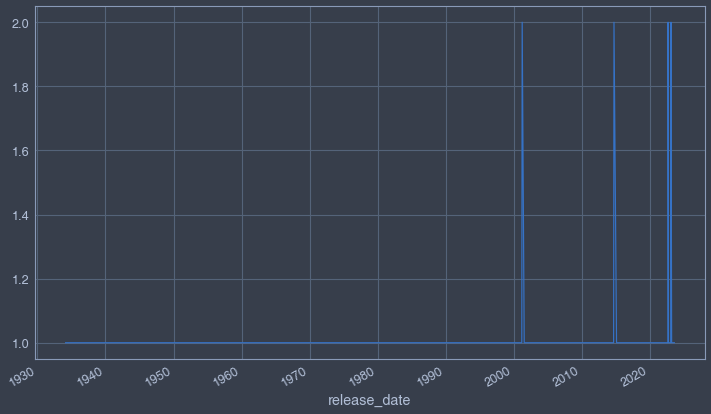

In [82]:
num_of_comedy_romance['title'].plot()

In [46]:
date_index = movies_df.copy()
date_index.reset_index(inplace=True)
# date_index.drop('id', axis=1, inplace=True)
date_index.set_index(['release_date'], inplace=True)

In [47]:
date_index

,id,genre_ids,overview,popularity,title,vote_average,vote_count,genres,cast,crew,keywords
release_date,,,,,,,,,,,
2023-05-17,385687,"[28, 80, 53]",Over many missions and against impossible odds...,4654.279,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
2023-06-09,697843,"[28, 53]",Tasked with extracting a family who is at the ...,2494.010,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
2023-03-22,603692,"[28, 53, 80]","With the price on his head ever increasing, Jo...",1920.127,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
2023-05-31,569094,"[28, 12, 16, 878]","After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
2023-04-05,502356,"[16, 10751, 12, 14, 35]","While working underground to fix a water main,...",1539.037,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-21,15017,"[35, 10749]",A young professional woman (Simpson) unwitting...,11.077,Blonde Ambition,4.6,97,"Comedy, Romance","[{'cast_id': 52052, 'name': 'Jessica Simpson',...","[{'crew_id': 7413, 'name': 'Mark Irwin', 'depa...","[{'id': 6593, 'name': 'stripper'}, {'id': 9713..."
1990-03-22,79509,"[28, 53, 35]",Josh meets a young woman who shortly afterward...,11.076,The Ambulance,5.9,85,"Action, Thriller, Comedy","[{'cast_id': 21315, 'name': 'Eric Roberts', 'c...","[{'crew_id': 13670, 'name': 'Jacques Haitkin',...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
2003-04-16,13370,"[35, 10402]",Director Christopher Guest reunites the team f...,11.075,A Mighty Wind,6.8,206,"Comedy, Music","[{'cast_id': 12438, 'name': 'Bob Balaban', 'ch...","[{'crew_id': 3032, 'name': 'Robert Leighton', ...","[{'id': 11800, 'name': 'mockumentary'}, {'id':..."


In [63]:
genres = date_index.groupby('genres').count()

In [66]:
genres_by_date.value_counts(['genres'])

genres                               
Drama                                    454
Comedy                                   394
Comedy, Romance                          239
Drama, Romance                           229
Horror, Thriller                         198
                                        ... 
Drama, Family, Fantasy, TV Movie           1
Drama, Family, Fantasy, Romance            1
Drama, Family, Fantasy, Adventure          1
Drama, Family, Comedy, Crime, Mystery      1
Drama, Crime, Documentary                  1
Length: 2238, dtype: int64

In [92]:
genres

,id,genre_ids,overview,popularity,title,vote_average,vote_count,cast,crew,keywords
genres,,,,,,,,,,
Action,81,81,81,81,81,81,81,81,81,81
"Action, Adventure",17,17,17,17,17,17,17,17,17,17
"Action, Adventure, Animation",3,3,3,3,3,3,3,3,3,3
"Action, Adventure, Animation, Comedy",1,1,1,1,1,1,1,1,1,1
"Action, Adventure, Animation, Comedy, Family",4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
"Western, Mystery",1,1,1,1,1,1,1,1,1,1
"Western, Mystery, Thriller, Drama",1,1,1,1,1,1,1,1,1,1
"Western, Romance",2,2,2,2,2,2,2,2,2,2


In [59]:
corr_df = movies_df[['popularity', 'vote_average', 'vote_count']]

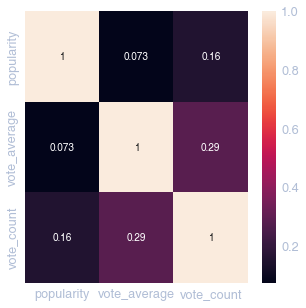

In [61]:
corr = corr_df.corr()
corr_features = corr.index
plt.figure(figsize=(5,5))
g = sns.heatmap(corr_df[corr_features].corr(), annot=True)